(400000, 12)
-0.0803663195
14.434345428514414
Optimization terminated successfully.
         Current function value: 0.296950
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:               200000
Model:                         Probit   Df Residuals:                   199998
Method:                           MLE   Df Model:                            1
Date:                Wed, 22 May 2024   Pseudo R-squ.:                  0.5716
Time:                        14:41:28   Log-Likelihood:                -59390.
converged:                       True   LL-Null:                   -1.3863e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0153      0.004      3.701      0.000       0

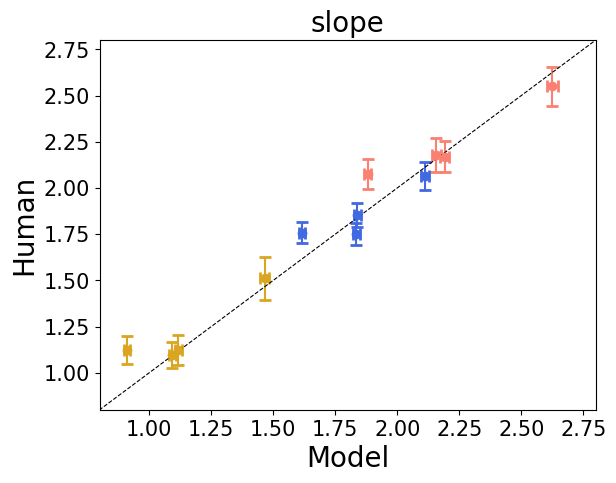

In [1]:
import pandas as pd
import numpy as np
from statsmodels.discrete.discrete_model import Probit
from statsmodels.regression.mixed_linear_model import MixedLM
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn
plt.style.use('default')
def standardization(data):
    data = np.array(data)
    mu = np.mean(data, axis=0)
    print(mu)
    sigma = np.std(data, axis=0)
    print(sigma)
    return (data ) / (sigma + 1e-9)


if __name__ == '__main__':

    conditions = ['RS','SR','RR','SS']
    const_list = []
    v_list = []
    std_const_list = []
    std_v_list = []
    # ori_list = [2.1702, 2.177, 2.0738, 2.5492,1.7513,1.852,1.7582,2.0644,1.1225,1.0966,1.122,1.511]
    ori_list = [2.1702, 1.7513, 1.1225, 2.177, 1.852, 1.0966, 2.0738, 1.7582, 1.122, 2.5492,2.0644, 1.511]
    ori_list_std = [0.08596,0.058648,0.079563,0.091346,0.0658,0.072495,0.080938,0.055863,0.075369,0.10639,0.074828,0.11458]
    fit_list = []
    fit_std_list = []
    colors = ['salmon', 'royalblue', 'goldenrod']
    for cond in conditions:
        path_list = [f'/home/ubuntu/PycharmProjects/Brain-inspired-Exploration/Brain-inspired-Exploration/Data_fitting/human_data_fan23/saved/analysed_2D_fan_' + cond + 'high2.csv',f'/home/ubuntu/PycharmProjects/Brain-inspired-Exploration/Brain-inspired-Exploration/Data_fitting/human_data_fan23/saved/analysed_2D_fan_'+cond+'low2.csv',f'/home/ubuntu/PycharmProjects/Brain-inspired-Exploration/Brain-inspired-Exploration/Data_fitting/human_data_gershman19/saved/analysed_2D_Gershman_'+cond+'4.csv']
        for (i,path) in enumerate(path_list):
            Data = pd.read_csv(path)
            print(Data.shape)
            Data['choice'] = Data['choice'] & 1
            Data = Data[Data.trial > 4]
            Data = Data[Data.trial < 15]
            C_list = Data['choice'].tolist()
            Y = C_list
            V_list = (Data['Q0']-Data['Q1']).tolist()
            V_list = standardization(V_list)
            X = np.array(V_list).T
            X = pd.DataFrame(X, columns=['V'])
            X = sm.add_constant(X)
            model = Probit(Y, X)
            probit_model = model.fit()
            const = probit_model.params['const']
            v = probit_model.params['V']
            std_const = probit_model.params['const'] - probit_model.conf_int()[0]['const']
            std_v = probit_model.params['V'] - probit_model.conf_int()[0]['V']
            const_list.append(const)
            std_const_list.append(std_const)
            std_v_list.append(std_v)
            print(probit_model.summary())
            fit_list.append(v)
            fit_std_list.append(std_v)


    plt.errorbar( fit_list[::3],ori_list[::3], xerr=fit_std_list[::3], yerr=ori_list_std[::3], fmt='o', capsize=4,
                 capthick=2, color=colors[0], label='Fan23_high_anxiety')
    plt.errorbar(fit_list[1::3], ori_list[1::3], xerr=fit_std_list[1::3], yerr=ori_list_std[1::3], fmt='o', capsize=4,
                 capthick=2, color=colors[1], label='Fan23_low_anxiety')
    plt.errorbar(fit_list[2::3], ori_list[2::3], xerr=fit_std_list[2::3], yerr=ori_list_std[2::3], fmt='o', capsize=4,
                 capthick=2, color=colors[2], label='Gershman19')
    plt.ylabel('Human',size=20)
    plt.xlabel('Model',size=20)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.plot([0,10], [0,10], color='k', linestyle='--',linewidth=0.8)
    plt.xlim([0.8,2.8])
    plt.ylim([0.8, 2.8])
    plt.title('slope',size=20)
    # plt.legend(prop={'size': 15})
    plt.show()
